In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.callbacks import TensorBoard
import time

NAME = "aaaCats-vs-dog-cnn-64x2-{}".format(int(time.time()))

tensorboard = TensorBoard(log_dir = 'logs\\{}'.format(NAME))

DATADIR="C:\\Users\Brandon\\Downloads\catsdogs\\PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # so we have 2 folders, cats and dogs. this get sus into either cats or dogs folder
    for img in os.listdir(path): # iterate through all images
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # full path to that image and read that image in
        break
    break
        

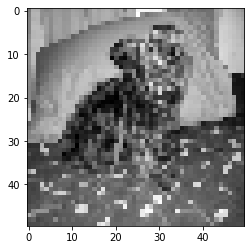

In [51]:
IMG_SIZE = 50
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [52]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # so we have 2 folders, cats and dogs. this get sus into either cats or dogs folder

In [53]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # so we have 2 folders, cats and dogs. this get sus into either cats or dogs folder
        class_num = CATEGORIES.index(category) # 0 for dog, 1 for cat
        for img in os.listdir(path): # iterate through all images
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # full path to that image and read that image in
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()


In [54]:
print(len(training_data))

24946


In [55]:
import random

random.shuffle(training_data)

In [56]:
for sample in training_data[:10]:
    print(sample[1]) # checking our data is correct

1
0
1
1
0
0
0
0
0
1


In [57]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 because it is grayscale

In [58]:
# we dont have the answer right away, so it's not going ot as simple as just throw it all in. we dont know, we want to tweak

In [59]:
np.save('features.npy',x) #saving


we use convolutions to find some useful thing and we pool these things together

we take an image and convert that image to pixel data (to a grid, proably)
the idea is that you have a window (a convolutional window) and in that winow the convolution will attempt to simplfy what it found down to som esort of value

when it does that, the window shifts over to a bunch of windows

in general the most common type of pooling is max pooling

all max pooling does is find the max value

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# we want ot normalise data. easiest way to normalies data is to scale that data. in our casem we;re using imagery data. we know what hte min and max
# values are, so we can just divide by 25
x = x/255.0

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape = x.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
# actiation before dense layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x, y, batch_size = 32, epochs=5, validation_split=0.1, callbacks=[tensorboard]) 
# batch size is how many we want to pass to train at a time. generally good idea to do between 20 and 200


Train on 22451 samples, validate on 2495 samples
Epoch 1/5
22451/22451 [==============================] - 93s 4ms/sample - loss: 0.6932 - acc: 0.4992 - val_loss: 0.6931 - val_acc: 0.5090
Epoch 2/5
22451/22451 [==============================] - 116s 5ms/sample - loss: 0.6932 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5090
Epoch 3/5
   96/22451 [..............................] - ETA: 2:13 - loss: 0.6933 - acc: 0.4167

KeyboardInterrupt: 